In [1]:
import pandas as pd
import talib
import numpy as np
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.signal import argrelmax
from scipy.signal import argrelmin
from mpl_finance import candlestick2_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

/Users/dp/Workspace/trapezium/python/dev-env/lib/python3.12/site-packages/mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:

df = pd.read_csv('../data/tick.csv')

#List all columns in CSV file
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

#Set index values (0, 1, 2...) as a Date Value
df = df.set_index(df.date)


In [7]:
print(df['date'])

date
01/02/2019 05:00:00    01/02/2019 05:00:00
02/01/2019 06:00:00    02/01/2019 06:00:00
02/01/2019 07:00:00    02/01/2019 07:00:00
02/01/2019 08:00:00    02/01/2019 08:00:00
02/01/2019 09:00:00    02/01/2019 09:00:00
                              ...         
31/01/2019 16:00:00    31/01/2019 16:00:00
31/01/2019 17:00:00    31/01/2019 17:00:00
31/01/2019 18:00:00    31/01/2019 18:00:00
31/01/2019 19:00:00    31/01/2019 19:00:00
31/01/2019 20:00:00    31/01/2019 20:00:00
Name: date, Length: 533, dtype: object


In [8]:
df = df.drop_duplicates(keep=False)

#Convert Date column to a list
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y %H:%M:%S").tolist()


In [10]:
#Only select last 200 values ['start':'end']
df = df.iloc[:200]

#Make copies of each column not to corrupt data
open = df.open.copy()
high = df.high.copy()
low = df.low.copy()
close = df.close.copy()
volume = df.volume.copy()
prices = df.close.copy()

#TA-LIB Doji Scanner
doji = talib.CDLDOJI(open, high, low, close)
doji_star = talib.CDLDRAGONFLYDOJI(open, high, low, close)

In [11]:

#Create a Doji Column, replace Doji points with with an candle close price
df['doji'] = doji
df['doji'] = np.where(df['doji'] > 0, close, 0)

df['doji_star'] = doji_star
df['doji_star'] = np.where(df['doji_star'] > 0, close, 0)

#Create new Complete_Doji column, merges both columns together and finds maximas
df['complete_doji'] = np.where(df['doji'] > 0, df['doji'], df['doji_star'])
complete_doji = df['complete_doji']
complete_doji_prices = [x for x in complete_doji if x != 0]

df['complete_doji_idx'] = np.where(df['complete_doji'] > 0, complete_doji.index, 0)
complete_doji_idx = df['complete_doji_idx']
complete_doji_idx = list(complete_doji_idx)
print(complete_doji_idx)
#print(complete_doji_idx)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '02/01/2019 16:00:00', 0, 0, 0, 0, 0, 0, 0, '03/01/2019 00:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '03/01/2019 11:00:00', 0, 0, 0, '03/01/2019 15:00:00', 0, 0, 0, 0, 0, '03/01/2019 21:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '04/01/2019 10:00:00', 0, 0, 0, 0, 0, 0, '04/01/2019 17:00:00', 0, 0, 0, '04/01/2019 21:00:00', '04/01/2019 22:00:00', 0, 0, 0, 0, '07/01/2019 01:00:00', 0, 0, 0, 0, 0, 0, 0, '07/01/2019 09:00:00', 0, 0, 0, '07/01/2019 13:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '08/01/2019 01:00:00', 0, 0, 0, 0, 0, 0, '08/01/2019 08:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '09/01/2019 01:00:00', 0, '09/01/2019 03:00:00', 0, '09/01/2019 05:00:00', '09/01/2019 06:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '09/01/2019 17:00:00', 0, 0, 0, '09/01/2019 21:00:00', 0, 0, 0, 0, '10/01/2019 02:00:00', '10/01/2019 03:00:00', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '10/01/2019 16:00:00', 0, 0, 0, '10/01/2019 20:00:00', 0, 0, '10/01/2019 23:00:00', 0, 0

In [12]:
#TA-LIB Trend line scanner - https://ta-lib.github.io/ta-lib-python/func_groups/pattern_recognition.html
trend_line = talib.HT_TRENDLINE(close)

#Replace first 63 rows, 'NaN' values with 0s, create a new Trendline Column
trend_line.fillna(0, inplace=True)
df['trend_line'] = trend_line

#TA-LIB RSI Scanner
rsi = talib.RSI(close, timeperiod=7)

#Fill 'NaN' values with 0s
df['rsi'] = rsi.fillna(0)

#Create new columns for RSI70 and RSI30 and fill with rsi values if Above/Below
df['rsi70'] = np.where(df['rsi'] >= 70, rsi, 0)
df['rsi30'] = np.where(df['rsi'] <= 30, rsi, 0)

In [13]:
#Create Above/Below trend columns and insert Doji prices if Above/Below trend line
df['above_trend'] = np.where(df['complete_doji'] > df['trend_line'], df.complete_doji, 0)
above_trend = df['above_trend']
df['below_trend'] = np.where(df['complete_doji'] < df['trend_line'], df.complete_doji, 0)
below_trend = df['below_trend']

df['five_max'] = np.where(df['above_trend'] > 0, 1, 0)
five_max = df['five_max']
five_max_list = list(five_max)

df['five_min'] = np.where(df['below_trend'] > 0, 1, 0)
five_min = df['five_min']
five_min_list = list(five_min)

In [14]:
for i in range(len(five_max_list)):
    if five_max_list[i] == 1:
        five_max_list[i-1] = high[i+1]
        five_max_list[i - 2] = high[i+2]
        five_max_list[i - 3] = high[i+3]
        #five_max_list[i - 4] = 1
    else:
        pass

for i in range(len(five_min_list)):
    if five_min_list[i] == 1:
        five_min_list[i-1] = 1
        five_min_list[i - 2] = 1
        five_min_list[i - 3] = 1
        #five_min_list[i - 4] = 1
    else:
        pass

df['Five_max_list'] = five_max_list
df['Five_max_list'] = np.where(df['Five_max_list'] > 0, high, 0)
five_max_list = df['Five_max_list']
df['Five_min_list'] = five_min_list
df['Five_min_list'] = np.where(df['Five_min_list'] > 0, low, 0)
five_min_list = df['Five_min_list']

/var/folders/qn/rlcshjw96356m1p9pp9vl9h40000gp/T/ipykernel_33488/2904143024.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  five_max_list[i-1] = high[i+1]
/var/folders/qn/rlcshjw96356m1p9pp9vl9h40000gp/T/ipykernel_33488/2904143024.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  five_max_list[i - 2] = high[i+2]
/var/folders/qn/rlcshjw96356m1p9pp9vl9h40000gp/T/ipykernel_33488/2904143024.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.i

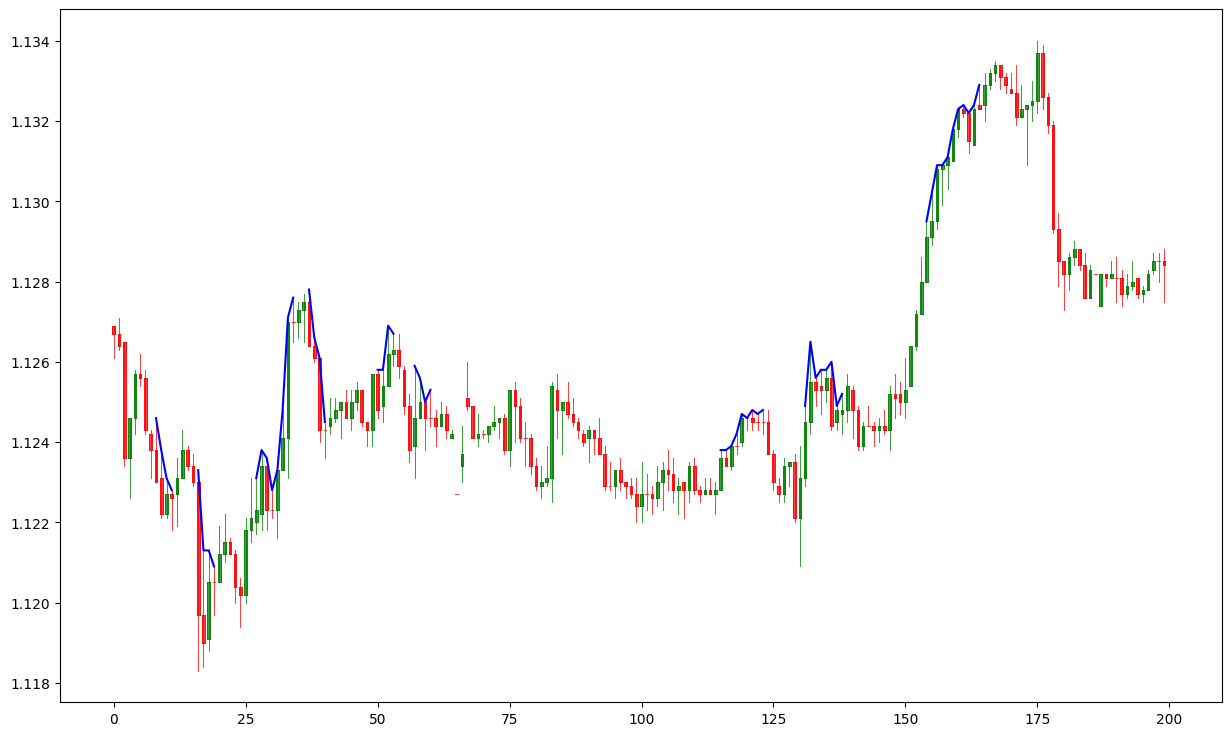

In [18]:
#Set up a windows size and plot OHLC
fig, ax = plt.subplots(figsize=[15, 9])
candlestick2_ohlc(ax, df['open'], df['high'], df['low'], df['close'], colorup='green', colordown='red', width=0.5)

#Plot valid Doji prices on graph, x and y are same length in this data set
#Doji_idx returns only indexes with valid doji pattern, doji return a price value
#plt.scatter(complete_doji_idx.index, complete_doji_prices, color='b')

def max_to_nan(five_max_list):
    return[float('nan') if x == 0 else x for x in five_max_list]
plt.plot(max_to_nan(five_max_list), color='b')

def min_to_nan(five_min_list):
    return[float('nan') if x == 0 else x for x in five_min_list]
plt.plot(min_to_nan(five_min_list), color='b')

# #Get rid of '0' values and replace with 'NaN' for plotting a graph
# #This is a full data list e.g. 200 rows, both x and y are same lenght
# def trend_to_nan(trend_line):
#     return[float('nan') if x == 0 else x for x in trend_line]
# plt.plot(trend_to_nan(trend_line))

plt.show()

In [16]:
#Generate a new CSV File with complete data frame
df.to_csv("doji-out.csv")